#Import Data

link dataset : https://drive.google.com/file/d/1rLBwDexcFhMFdlEha1L_ea3brlDxo5vX/view?usp=sharing

In [1]:
#!gdown --id '1rLBwDexcFhMFdlEha1L_ea3brlDxo5vX'

In [2]:
#!unzip dataset_kemayoran.zip

In [3]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error,mean_absolute_percentage_error
from scipy.stats import pearsonr

In [4]:
path = os.getcwd()
files = os.listdir(path)
files

['.ipynb_checkpoints',
 'app.py',
 'check.py',
 'dataset_kemayoran.zip',
 'laporan_iklim_harian_apr_2019.xlsx',
 'laporan_iklim_harian_apr_2020.xlsx',
 'laporan_iklim_harian_aug_2019.xlsx',
 'laporan_iklim_harian_aug_2020.xlsx',
 'laporan_iklim_harian_des_2019.xlsx',
 'laporan_iklim_harian_des_2020.xlsx',
 'laporan_iklim_harian_feb_2019.xlsx',
 'laporan_iklim_harian_feb_2020.xlsx',
 'laporan_iklim_harian_jan_2019.xlsx',
 'laporan_iklim_harian_jan_2020.xlsx',
 'laporan_iklim_harian_jul_2019.xlsx',
 'laporan_iklim_harian_jul_2020.xlsx',
 'laporan_iklim_harian_jun_2019.xlsx',
 'laporan_iklim_harian_jun_2020.xlsx',
 'laporan_iklim_harian_mar_2019.xlsx',
 'laporan_iklim_harian_mar_2020.xlsx',
 'laporan_iklim_harian_mei_2019.xlsx',
 'laporan_iklim_harian_mei_2020.xlsx',
 'laporan_iklim_harian_nov_2019.xlsx',
 'laporan_iklim_harian_nov_2020.xlsx',
 'laporan_iklim_harian_okt_2019.xlsx',
 'laporan_iklim_harian_okt_2020.xlsx',
 'laporan_iklim_harian_sep_2019.xlsx',
 'laporan_iklim_harian_sep_202

In [5]:
files_xlsx = [f for f in files if f[-4:] == 'xlsx']
files_xlsx

['laporan_iklim_harian_apr_2019.xlsx',
 'laporan_iklim_harian_apr_2020.xlsx',
 'laporan_iklim_harian_aug_2019.xlsx',
 'laporan_iklim_harian_aug_2020.xlsx',
 'laporan_iklim_harian_des_2019.xlsx',
 'laporan_iklim_harian_des_2020.xlsx',
 'laporan_iklim_harian_feb_2019.xlsx',
 'laporan_iklim_harian_feb_2020.xlsx',
 'laporan_iklim_harian_jan_2019.xlsx',
 'laporan_iklim_harian_jan_2020.xlsx',
 'laporan_iklim_harian_jul_2019.xlsx',
 'laporan_iklim_harian_jul_2020.xlsx',
 'laporan_iklim_harian_jun_2019.xlsx',
 'laporan_iklim_harian_jun_2020.xlsx',
 'laporan_iklim_harian_mar_2019.xlsx',
 'laporan_iklim_harian_mar_2020.xlsx',
 'laporan_iklim_harian_mei_2019.xlsx',
 'laporan_iklim_harian_mei_2020.xlsx',
 'laporan_iklim_harian_nov_2019.xlsx',
 'laporan_iklim_harian_nov_2020.xlsx',
 'laporan_iklim_harian_okt_2019.xlsx',
 'laporan_iklim_harian_okt_2020.xlsx',
 'laporan_iklim_harian_sep_2019.xlsx',
 'laporan_iklim_harian_sep_2020.xlsx']

In [6]:
df = pd.DataFrame()

In [7]:
for f in files_xlsx:
    data = pd.read_excel(f)
    df = df.append(data)

In [8]:
df = df.reset_index()
df = df.drop(['index'],axis=1)

In [9]:
df

,Tanggal,Tn,Tx,Tavg,RH_avg,RR,ss,ff_x,ddd_x,ff_avg,ddd_car
0,01-04-2019,26.6,32.6,28.3,76.0,8888.0,4.5,4.0,200.0,2.0,C
1,02-04-2019,25.0,33.0,27.7,79.0,12.0,5.0,6.0,280.0,2.0,C
2,03-04-2019,25.0,32.8,28.1,82.0,8.8,6.1,6.0,290.0,2.0,C
3,04-04-2019,25.2,32.8,29.4,74.0,5.6,7.8,4.0,300.0,2.0,NW
4,05-04-2019,26.8,32.2,28.5,79.0,8888.0,6.0,5.0,320.0,2.0,C
...,...,...,...,...,...,...,...,...,...,...,...
726,26-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
727,27-09-2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
728,28-09-2020,25.6,34.4,29.4,70.0,2.5,4.5,4.0,80.0,2.0,C
729,29-09-2020,26.6,32.8,29.7,64.0,0.0,7.6,6.0,330.0,2.0,C


#Validasi Data

In [10]:
df['Tanggal'] =  pd.to_datetime(df['Tanggal'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  731 non-null    datetime64[ns]
 1   Tn       703 non-null    float64       
 2   Tx       714 non-null    float64       
 3   Tavg     715 non-null    float64       
 4   RH_avg   715 non-null    float64       
 5   RR       590 non-null    float64       
 6   ss       716 non-null    float64       
 7   ff_x     718 non-null    float64       
 8   ddd_x    718 non-null    float64       
 9   ff_avg   718 non-null    float64       
 10  ddd_car  718 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 60.0+ KB


# Seleksi Fitur Data

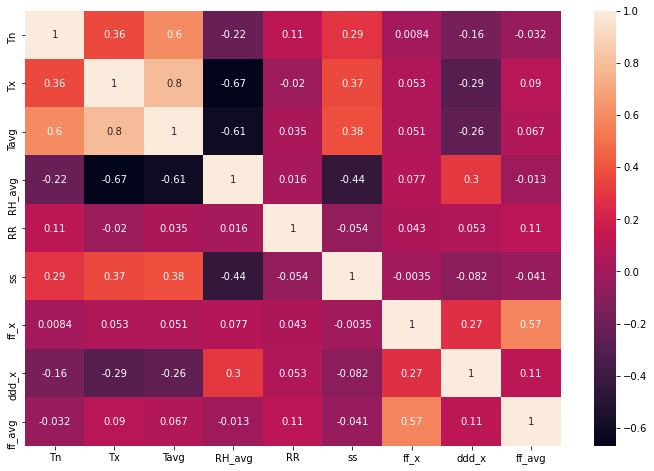

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

berdasarkan korelasi diatas kami menggunakan 'Tn', 'Tx', 'Tavg', 'RH_avg', 'ss'

In [13]:
df = df.drop(['RR', 'ff_x','ddd_x','ff_avg','ddd_car'], axis=1)

In [14]:
df

,Tanggal,Tn,Tx,Tavg,RH_avg,ss
0,2019-01-04,26.6,32.6,28.3,76.0,4.5
1,2019-02-04,25.0,33.0,27.7,79.0,5.0
2,2019-03-04,25.0,32.8,28.1,82.0,6.1
3,2019-04-04,25.2,32.8,29.4,74.0,7.8
4,2019-05-04,26.8,32.2,28.5,79.0,6.0
...,...,...,...,...,...,...
726,2020-09-26,NaN,NaN,NaN,NaN,NaN
727,2020-09-27,NaN,NaN,NaN,NaN,NaN
728,2020-09-28,25.6,34.4,29.4,70.0,4.5
729,2020-09-29,26.6,32.8,29.7,64.0,7.6


# Data Cleaning

In [15]:
df.isna().sum()

Tanggal     0
Tn         28
Tx         17
Tavg       16
RH_avg     16
ss         15
dtype: int64

In [16]:
df.mean()

<ipython-input-16-c61f0c8f89b5>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df.mean()


Tn        25.869701
Tx        32.516106
Tavg      28.752587
RH_avg    75.201399
ss         4.744832
dtype: float64

In [17]:
df = df.fillna(df.mean())

<ipython-input-17-04e87d67d337>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df = df.fillna(df.mean())


In [18]:
df.isna().sum()

Tanggal    0
Tn         0
Tx         0
Tavg       0
RH_avg     0
ss         0
dtype: int64

In [19]:
df

,Tanggal,Tn,Tx,Tavg,RH_avg,ss
0,2019-01-04,26.600000,32.600000,28.300000,76.000000,4.500000
1,2019-02-04,25.000000,33.000000,27.700000,79.000000,5.000000
2,2019-03-04,25.000000,32.800000,28.100000,82.000000,6.100000
3,2019-04-04,25.200000,32.800000,29.400000,74.000000,7.800000
4,2019-05-04,26.800000,32.200000,28.500000,79.000000,6.000000
...,...,...,...,...,...,...
726,2020-09-26,25.869701,32.516106,28.752587,75.201399,4.744832
727,2020-09-27,25.869701,32.516106,28.752587,75.201399,4.744832
728,2020-09-28,25.600000,34.400000,29.400000,70.000000,4.500000
729,2020-09-29,26.600000,32.800000,29.700000,64.000000,7.600000


In [20]:
df.describe()

,Tn,Tx,Tavg,RH_avg,ss
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,25.869701,32.516106,28.752587,75.201399,4.744832
std,0.901752,1.277296,0.912818,6.276614,2.358787
min,23.000000,27.400000,25.700000,57.000000,0.000000
25%,25.000000,31.800000,28.200000,71.000000,3.000000
50%,26.000000,32.600000,28.800000,75.000000,5.200000
75%,26.600000,33.400000,29.400000,80.000000,6.500000
max,28.000000,35.600000,31.200000,92.000000,9.800000


#Check Outlier

c:\users\faishal raihan\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


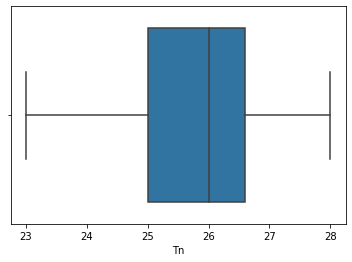

In [21]:
sns.boxplot(df['Tn'])

c:\users\faishal raihan\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


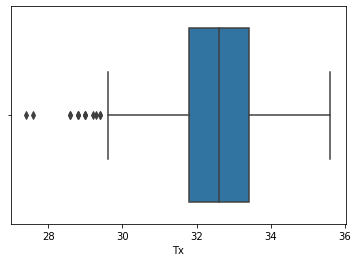

In [22]:
sns.boxplot(df['Tx'])

c:\users\faishal raihan\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


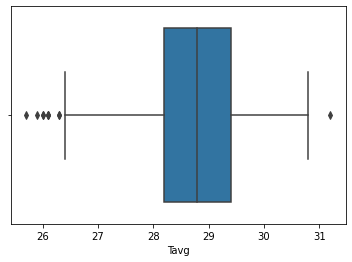

In [23]:
sns.boxplot(df['Tavg'])

c:\users\faishal raihan\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


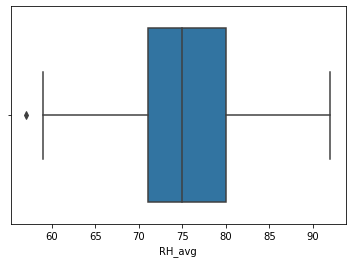

In [24]:
sns.boxplot(df['RH_avg'])

c:\users\faishal raihan\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


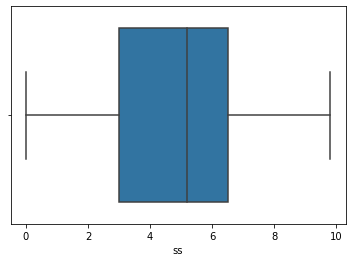

In [25]:
sns.boxplot(df['ss'])

Dikarenakan data outlier hanya sedikit dan masih dalam range normal, maka data tersebut tetap dipakai.

#Scaling Data

In [26]:
# data = df.drop(columns=['Tanggal'])

In [27]:
# scaler = StandardScaler()
# data_scaler = scaler.fit_transform(data)
# data_scaler = pd.DataFrame(data_scaler,columns=['Tn','Tx','Tavg','RH_avg','ss'])
# data_scaler
# #Tn	Tx	Tavg	RH_avg	ss

In [28]:
# data = pd.concat([df['Tanggal'], data_scaler], axis=1)
# data

#Eksplorasi Data

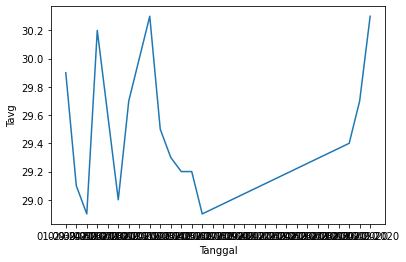

In [29]:
sns.lineplot(data=data, x="Tanggal", y="Tavg")

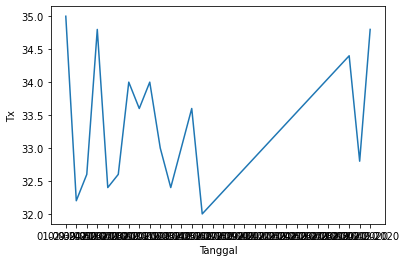

In [30]:
sns.lineplot(data=data, x="Tanggal", y="Tx")

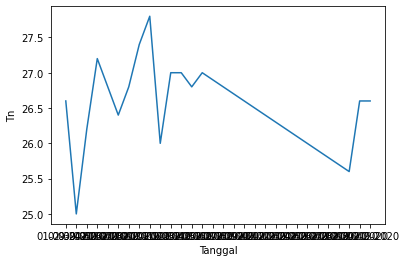

In [31]:
sns.lineplot(data=data, x="Tanggal", y="Tn")

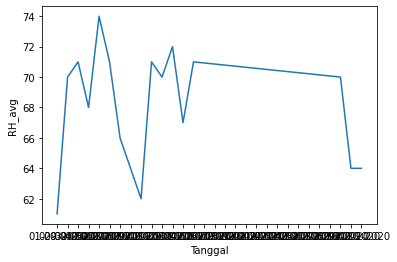

In [32]:
sns.lineplot(data=data, x="Tanggal", y="RH_avg")

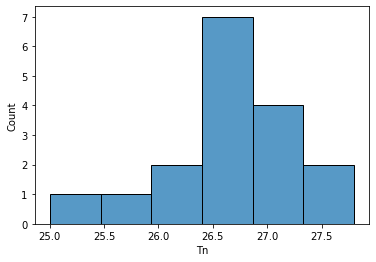

In [33]:
sns.histplot(data=data, x="Tn")

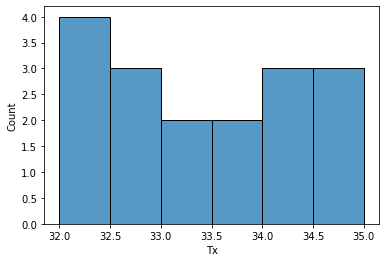

In [34]:
sns.histplot(data=data, x="Tx")

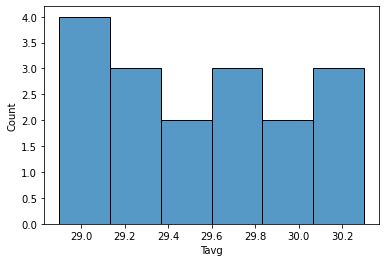

In [35]:
sns.histplot(data=data, x="Tavg")

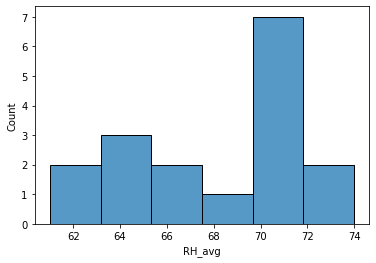

In [36]:
sns.histplot(data=data, x="RH_avg")

#Pemodelan

In [37]:
df = df.sort_values('Tanggal')
df.tail()

,Tanggal,Tn,Tx,Tavg,RH_avg,ss
179,2020-12-27,25.6,32.4,29.4,70.0,4.8
180,2020-12-28,26.4,33.0,29.1,70.0,7.0
181,2020-12-29,26.4,32.0,28.3,73.0,5.3
182,2020-12-30,25.6,32.6,28.0,75.0,1.5
183,2020-12-31,25.6,30.2,26.5,83.0,0.2


In [38]:
# data = df.drop(columns=['RR','ff_x','ddd_x','ff_avg','ddd_car'])
# data.head()

In [39]:
df.isna().sum()

Tanggal    0
Tn         0
Tx         0
Tavg       0
RH_avg     0
ss         0
dtype: int64

In [40]:
X = df.drop(columns=['Tavg'],axis=1)
y = pd.DataFrame(data=df[['Tavg','Tanggal']])
y = y.set_index('Tanggal')
y.sort_index()
X = X.set_index('Tanggal')
X.sort_index(axis=0,ascending=False)
# data.index
display(X.head())
display(y.head())

,Tn,Tx,RH_avg,ss
Tanggal,,,,
2019-01-01,24.0,30.6,84.0,5.5
2019-01-02,25.0,31.0,83.0,3.5
2019-01-03,26.8,31.0,80.0,5.0
2019-01-04,26.6,32.6,76.0,4.5
2019-01-05,26.0,31.4,76.0,1.5


,Tavg
Tanggal,
2019-01-01,26.0
2019-01-02,27.0
2019-01-03,28.3
2019-01-04,28.3
2019-01-05,28.6


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, shuffle=False)

In [42]:
clf=MLPRegressor(hidden_layer_sizes=(900,7), activation='relu',
             solver='adam',alpha=0.001, 
             batch_size=13, learning_rate='constant',learning_rate_init=0.001, 
             max_iter=1000, shuffle=True,random_state=5, tol=0.001, 
             early_stopping=True,
             verbose=True,
             validation_fraction=0.2
             )
clf.fit(X_train,y_train)
clf.predict(X_test)
clf.score(X_test, y_test)

c:\users\faishal raihan\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Iteration 1, loss = 68.27697687
Validation score: -22.465955
Iteration 2, loss = 2.84293586
Validation score: -3.923129
Iteration 3, loss = 1.74092844
Validation score: -3.106284
Iteration 4, loss = 1.59980223
Validation score: -2.483333
Iteration 5, loss = 1.37106301
Validation score: -2.039064
Iteration 6, loss = 1.07995333
Validation score: -1.220519
Iteration 7, loss = 0.84169656
Validation score: -0.674604
Iteration 8, loss = 0.76087690
Validation score: -0.893964
Iteration 9, loss = 0.57044597
Validation score: -0.160137
Iteration 10, loss = 0.44902700
Validation score: -0.063097
Iteration 11, loss = 0.36415750
Validation score: 0.234232
Iteration 12, loss = 0.27068143
Validation score: 0.382599
Iteration 13, loss = 0.21612252
Validation score: 0.482556
Iteration 14, loss = 0.17345563
Validation score: 0.529552
Iteration 15, loss = 0.14662468
Validation score: 0.595884
Iteration 16, loss = 0.14514023
Validation score: 0.542836
Iteration 17, loss = 0.13530056
Validation score: 0.6

0.7300625359159726

In [43]:
pred = clf.predict(X_test)
result = pd.DataFrame()
result['Actual'] = y_test['Tavg']
result['predict'] = pred
result.index = y_test.index
result.head()

,Actual,predict
Tanggal,,
2020-05-26,29.9,29.655172
2020-05-27,29.5,29.423500
2020-05-28,29.8,29.235061
2020-05-29,29.6,30.107126
2020-05-30,29.6,29.646528


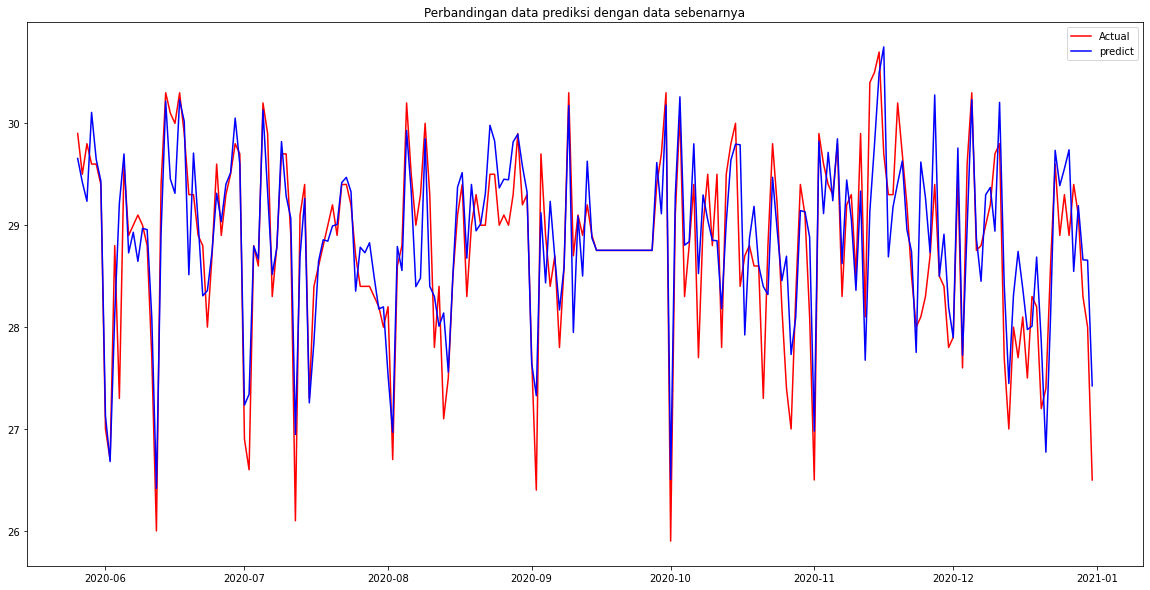

In [44]:
plt.figure(figsize=(20,10))
plt.plot(result.index,result.Actual,label="Actual",color='red')
plt.plot(result.predict,label="predict",color='blue')
plt.legend()
plt.title('Perbandingan data prediksi dengan data sebenarnya')
plt.show()

#Hasil evaluasi model :

In [45]:
MAPE = mean_absolute_percentage_error(y_test,pred)
RMSE = np.sqrt(mean_squared_error(y_test,pred))
acc, _ = pearsonr(result['Actual'], result['predict'])

In [46]:
print("MAPE : ",MAPE)
print("RMSE : ",RMSE)
print("Accuracy : ",acc*100)

MAPE :  0.012150786266545715
RMSE :  0.47272747510138446
Accuracy :  85.73454162558822


In [49]:
import pickle
with open('mlp_model.pkl', 'wb') as file:
    pickle.dump(clf, file)